# A Bellabeat Case Study Using Google Sheets, SQL, and Tableau


### 1. About Bellabeat

Bellabeat is a health and wellness brand founded by Urška Sršen and Sandro Murin in 2014. Bellabeat creates smart jewelry to monitor biometric and lifestyle data of women to help understand how their bodies work and make healthier choices. The [Bellabeat Leaf](https://bellabeat.com/product/leaf-urban/) was the company's first wearable device which tracked activity, sleep, stress resistance, menstrual cycle, and pregnancy. In 2021 Bellabeat launched the more advanced [Bellabeat Ivy](https://bellabeat.com/product/ivy/) tracker which includes features that track respiratory rate, resting heart rate, heart rate variability, daily steps, activity, and sleep activity.

### 2. Prepare Phase: Understanding the Data

The data used is [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/data) which was uploaded to Kaggle by MÖBIUS under the CC0 Public Domain License. The data was gathered through a survey on the Amazon Mechanical Turk platform. There were 30 eligible respondents that consented to the submission of their personal tracker data from their FitBit devices which included their physical activity intensity, steps taken, heart rate, and sleep habits.

The data comes in the form of 18 spreadsheets which have the merged data of all respondents. The spreadsheets used in this analysis are:

* dailyActivity_merged
* dailyCalories_merged
* dailyIntensities_merged
* dailySteps_merged
* hourlyCalories_merged
* hourlyIntensities_merged
* hourlySteps_merged
* sleepDay_merged

**The Limitations of the Data**

The data used is limited. Having a sample size of 30 respondents lowers the amount of meaningful insights that can be gained from this analysis. The data does not have any demographic information such as age, race, gender, or geolocation which would be beneficial for a more detailed analysis. The data was gathered over the timeframe of a month and may not be indicative of how people use fitness trackers throughout a year. The data is from 2016 which uses different metrics than modern fitness trackers, and is not recent so may not be indicative of current fitness tracker usage trends. Finally, there are some pieces of the data that are strongly unlikely to be accurate; like some users spending less than 2 hours in bed per day or taking 0 steps in a day.

### 3. Process Phase: Cleaning and Organizing the Data

**Google Sheets**

* **All Sheets**
    * Used the 'remove duplicates' tool on all sheets. Removed three duplicates from sleepDay_merged. No duplicates were found in any other sheet.
* **dailyActivity_merged**
    * Found that there are 33 respondents by using function =COUNTUNIQUE(A2:A941).
    * Changed columns TotalDistance, TrackerDistance, VeryActiveDistance, ModeratelyActiveDistance, and SedentaryActiveDistance to 2 decimal places rounded up.
    * Checked number of respondents by using function =COUNTIF(B2:B941, "4/12/2016") and checking each date. Found that the number of respondents gradually declined over time.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.
* **dailyCalories_merged**
    * Changed column header ActivityDay to ActivityDate.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.
* **dailyIntensities_merged**
    * Changed columns SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, and VeryActiveDistance to 2 decimal places rounded up.
    * Changed column header ActivityDay to ActivityDate.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.
* **dailySteps_merged**
    * Changed column header ActivityDay to ActivityDate.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.
* **hourlyCalories_merged**
    * Split the ActivityHour column into two new columns; ActivityDate and ActivityHour.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.
* **hourlyIntensities_merged**
    * Split the ActivityHour column into two new columns; ActivityDate and ActivityHour.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed column AverageIntensity to 2 decimal places rounded up.
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.
* **hourlySteps_merged**
    * Split the ActivityHour column into two new columns; ActivityDate and ActivityHour.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.
* **sleepDay_merged**
    * Split the ActivityHour column into two new columns; ActivityDate and ActivityHour.
    * Added column ActivityDay using function =CHOOSE(WEEKDAY(B2),"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
    * Changed format of ActivityDate column from Month/Day/Year to Year-Month-Day.

**BigQuery**

After importing all of the spreadsheets into BigQuery I started by checking how many respondents were in each table using SQL queries.

In [ ]:
SELECT
ActivityDate,
COUNT(Id) AS NumberOfRespondents
FROM ba-capstone-403220.fitbit_data.daily_activity
GROUP BY ActivityDate
ORDER BY ActivityDate

In [ ]:
SELECT
ActivityDate,
COUNT(Id) AS NumberOfRespondents
FROM ba-capstone-403220.fitbit_data.sleep_day
GROUP BY ActivityDate
ORDER BY ActivityDate

|Activity Data|Sleep Data|
|-------------|----------|
|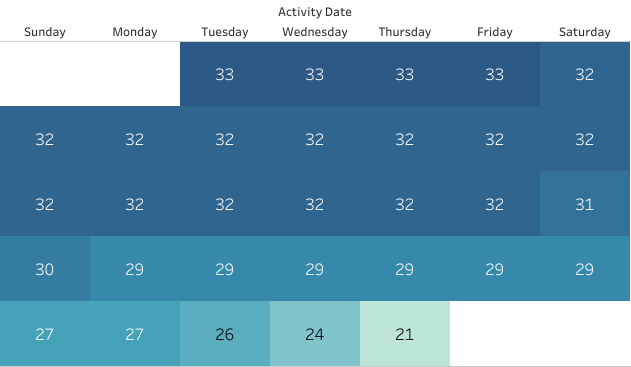|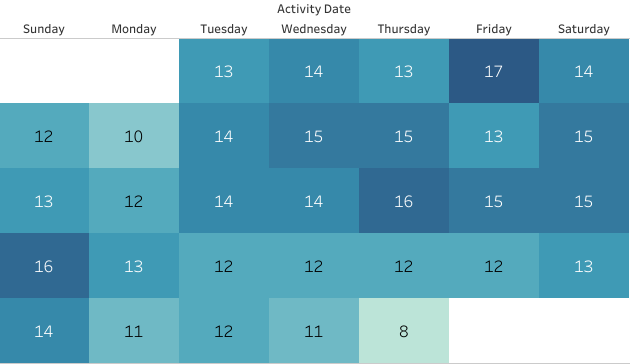|

I found that there were 33 unique respondents to the survey instead of the initial 30 mentioned which was consistent across all of the tables. However, of the 33 respondents, only 21 had activity data for every day. One respondent only had activity data for 4 days. I also found that 23 respondents had sleep data available, but only 3 had sleep data available for all 31 days. Due to a lack of data, I did not conduct an analysis on sleep activity.

### 4. Analyze and Share Phases: What Can We Learn From the Data?

The first thing I was interested in knowing is what days of the week people are tracking the most steps, and what days people are burning the most calories.

In [ ]:
SELECT
ActivityDay,
ROUND(AVG(StepTotal)) AS AverageSteps
FROM ba-capstone-403220.fitbit_data.daily_steps
WHERE StepTotal > 0
GROUP BY ActivityDay
ORDER BY (
  CASE WHEN ActivityDay = 'Monday' THEN 1
       WHEN ActivityDay = 'Tuesday' THEN 2
       WHEN ActivityDay = 'Wednesday' THEN 3
       WHEN ActivityDay = 'Thursday' THEN 4
       WHEN ActivityDay = 'Friday' THEN 5
       WHEN ActivityDay = 'Saturday' THEN 6
       WHEN ActivityDay = 'Sunday' THEN 7
  END
)

In [ ]:
SELECT
ActivityDay,
ROUND(AVG(Calories)) AS AverageCalories
FROM ba-capstone-403220.fitbit_data.daily_calories
WHERE Calories > 0
GROUP BY ActivityDay
ORDER BY (
  CASE WHEN ActivityDay = 'Monday' THEN 1
       WHEN ActivityDay = 'Tuesday' THEN 2
       WHEN ActivityDay = 'Wednesday' THEN 3
       WHEN ActivityDay = 'Thursday' THEN 4
       WHEN ActivityDay = 'Friday' THEN 5
       WHEN ActivityDay = 'Saturday' THEN 6
       WHEN ActivityDay = 'Sunday' THEN 7
  END
)

| Average Steps Per Day | Average Calories Per Day |
| --- | --- |
|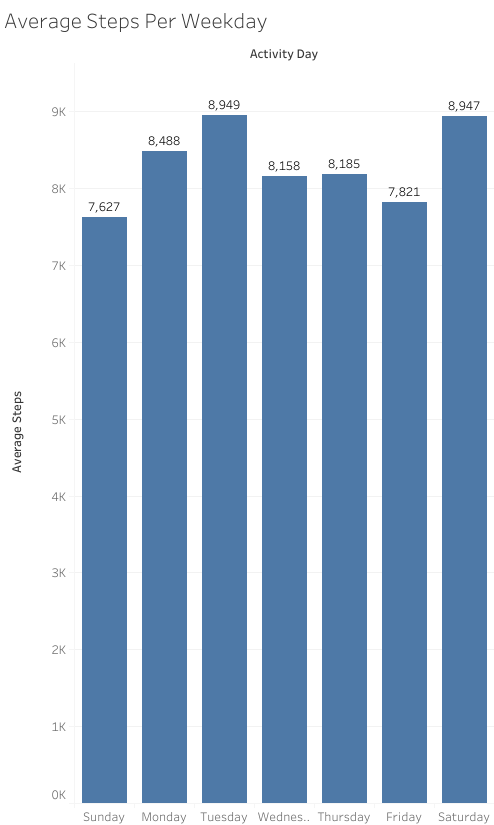|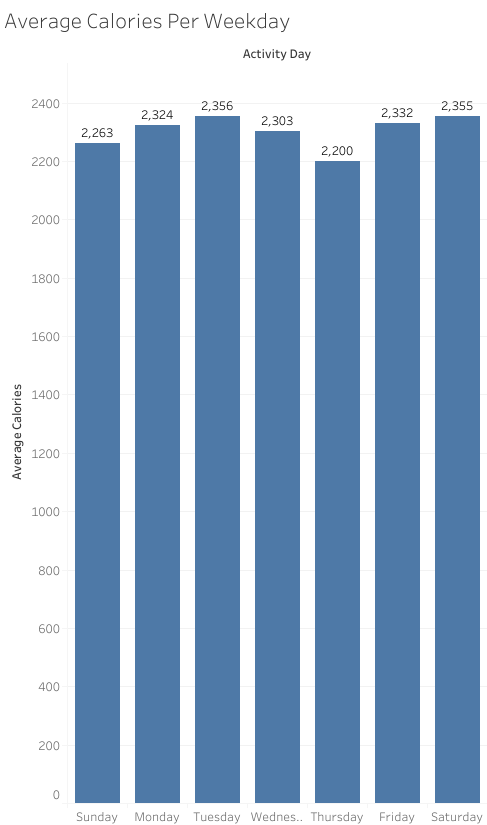|

People are taking **the most steps on Tuesdays and Saturdays**, which are the same days with the most calories burned. People are taking **the least steps on Sunday and Friday.** To visualize the relationship between steps taken and calories burned I created a scatterplot of each individual day of data.

In [ ]:
ActivityDate,
ROUND(AVG(StepTotal)) AS AverageSteps
FROM ba-capstone-403220.fitbit_data.daily_steps
WHERE StepTotal > 0
GROUP BY ActivityDate
ORDER BY ActivityDate

In [ ]:
ActivityDate,
ROUND(AVG(Calories)) AS AverageCalories
FROM ba-capstone-403220.fitbit_data.daily_steps
WHERE Calories > 0
GROUP BY ActivityDate
ORDER BY ActivityDate

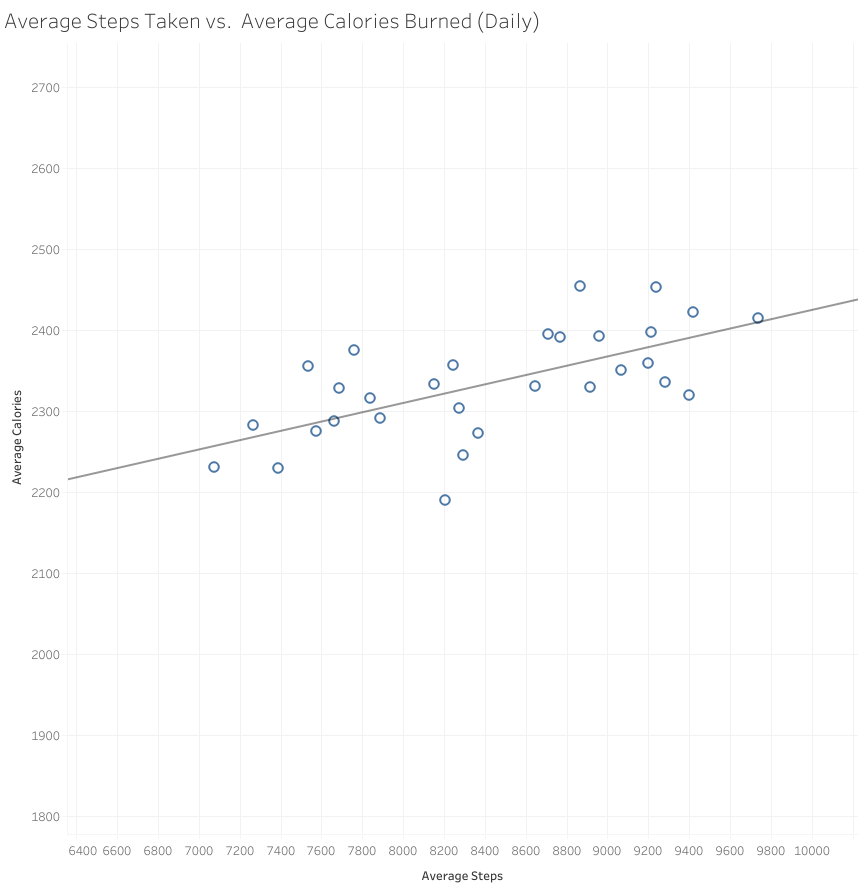

There is a positive correlation between steps taken and calories burned; **As you take more steps, you tend to burn more calories.** (P-value 0.0001289)

I was also interested to know what hours of the day people are taking the most steps.

In [ ]:
SELECT 
ActivityHour,
SUM(StepTotal) AS Total_Steps_Per_Hour
FROM ba-capstone-403220.fitbit_data.hourly_steps
GROUP BY ActivityHour

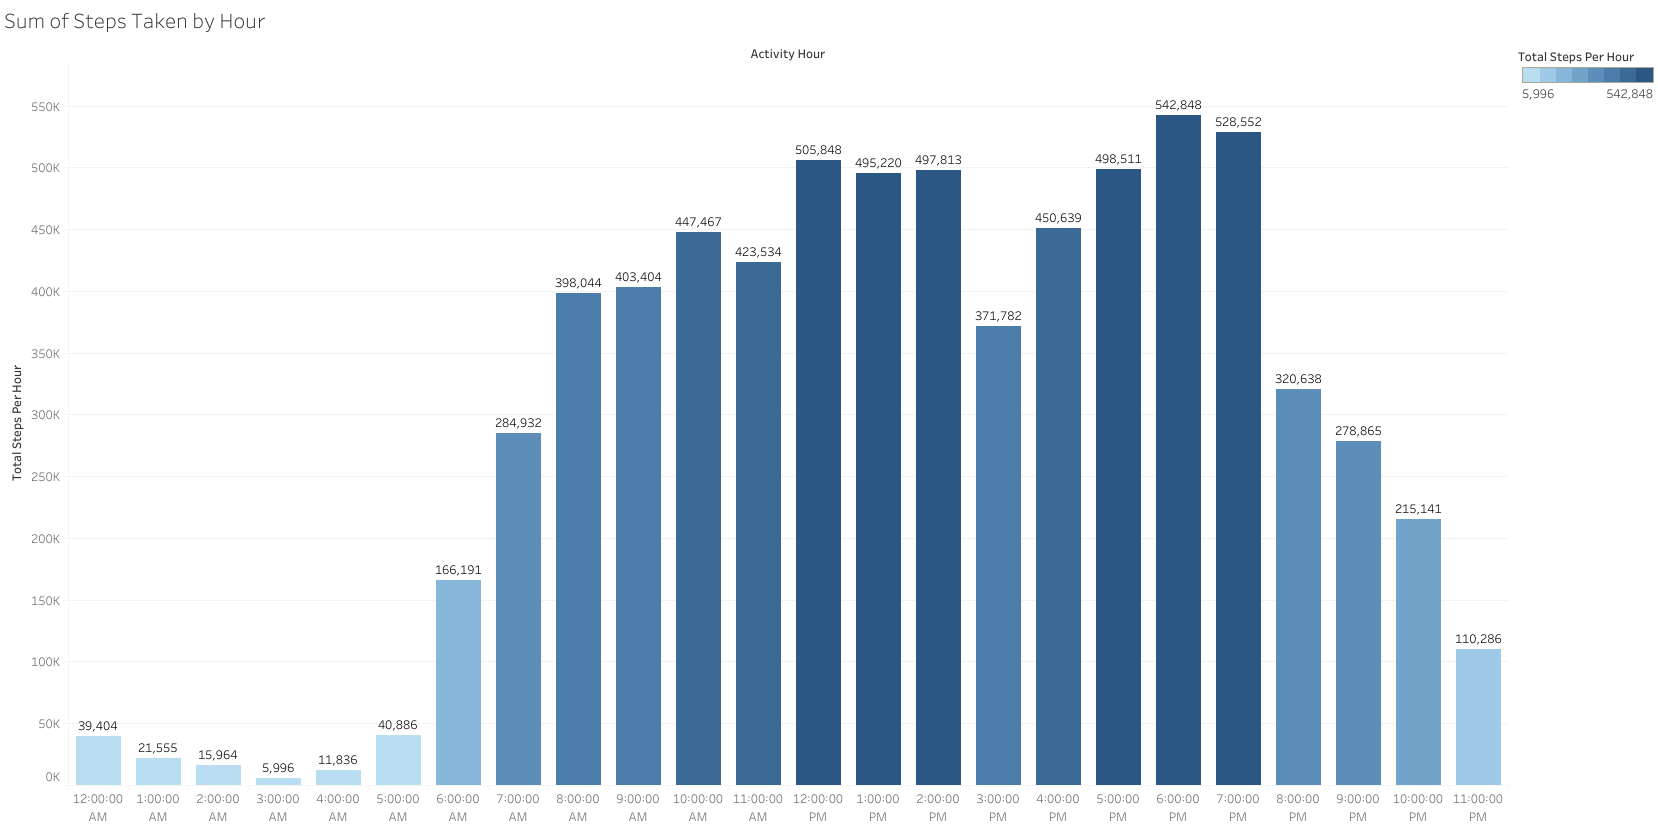

Between 6AM and 7AM is when people tend to start taking steps for the day. The time periods with the **most steps taken are Noon to 2PM** and **5PM to 7PM**. At 8PM the number of steps taken falls dramatically until the next morning.

Next I split the respondents into categories based on the activity levels from [this HealthLine article.](https://www.healthline.com/health/how-many-steps-a-day#to-improve-fitness) Their activity levels were mapped to their average daily steps.

* Very Active: 12,500 or More Steps
* Active: Between 10,000 and 12,499 Steps
* Somewhat Active: Between 7,500 and 9,999 Steps
* Low Active: Between 5,000 and 7,499 Steps
* Limited: Between 2,500 and 4,999 Steps
* Basal: 2,499 or Fewer Steps

In [ ]:
WITH cte_avg_steps_by_id AS
(SELECT
Id,
ROUND(AVG(StepTotal)) as AverageSteps
FROM ba-capstone-403220.fitbit_data.daily_steps
WHERE StepTotal > 0
GROUP BY Id)

SELECT
Id,
AverageSteps,
CASE
  WHEN AverageSteps > 12500 THEN 'Very Active'
  WHEN AverageSteps BETWEEN 10000 AND 12499 THEN 'Active'
  WHEN AverageSteps BETWEEN 7500 AND 9999 THEN 'Somewhat Active'
  WHEN AverageSteps BETWEEN 5000 AND 7499 THEN 'Low Active'
  WHEN AverageSteps BETWEEN 2500 AND 4999 THEN 'Limited'
  WHEN AverageSteps < 2500 THEN 'Basal'
  ELSE 'Look at this result'
END AS ActivityLevel
FROM cte_avg_steps_by_id
ORDER BY Id

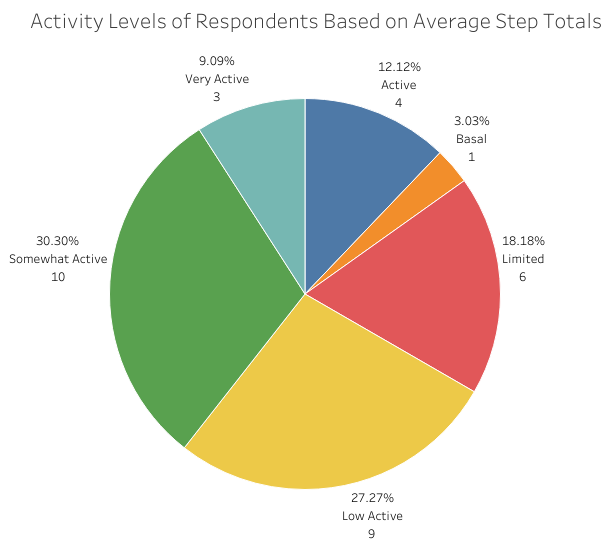

Here we can see that there is about **an even split between Moderate - Highly active users and Low active users** based on steps.

Next I looked at how many respondents met the [CDC recommendation for weekly aerobic activity.](https://www.cdc.gov/physicalactivity/basics/adults/index.htm) The CDC recommends that adults should either get 150 minutes every week of moderate-intensity aerobic activity or 75 minutes of vigorous-intensity aerobic activity.

In [ ]:
WITH cte_avg_active_minutes_per_day AS
(SELECT
Id,
ROUND(AVG(SedentaryMinutes)) AS AvgSedentaryMinutes,
ROUND(AVG(LightlyActiveMinutes)) AS AvgLightlyActiveMinutes,
ROUND(AVG(FairlyActiveMinutes)) AS AvgFairlyActiveMinutes,
ROUND(AVG(VeryActiveMinutes)) AS AvgVeryActiveMinutes
FROM ba-capstone-403220.fitbit_data.daily_activity
GROUP BY Id
ORDER BY Id ASC)

SELECT
Id,
CASE
  WHEN (AvgFairlyActiveMinutes + AvgVeryActiveMinutes) * 7 >= 150 THEN 'Meets Recommendation'
  WHEN AvgVeryActiveMinutes * 7 >= 75 THEN 'Meets Recommendation'
  ELSE 'Does Not Meet Recommendation'
END AS CDC_Recommendation
FROM cte_avg_active_minutes_per_day

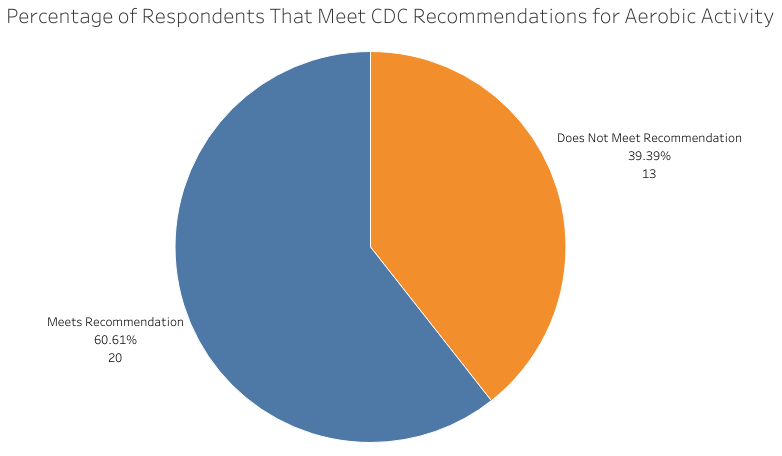

The metrics used for this chart were the Fairly Active and Very Active minutes logged. If the total weekly average of Fairly Active and Very Active minutes was greater than or equal to 150, or the total weekly average of Very Active minutes was greater than or equal to 75, then the respondents were considered to have met the CDC recommendations for aerobic activity. We can see that **60% of people using a fitness tracker meet CDC recommendations for aerobic activity.**

### 6. Act Phase: Conclusions and Recommendations

**Key Insights**

* Users take the most steps on Tuesdays and Saturdays
* Users take the least steps on Sunday and Friday
* Most steps are taken from Noon to 2pm and 5pm to 7pm
* As users take more steps they burn more calories
* There is an even split between Moderate - High and Low active users
* 60% of Users meet or exceed CDC recommendations for weekly aerobic activity

My findings could be expanded if I had data for a longer time frame, more respondents, and more demographic information available.

**Recommendations**

Based on the findings from this analysis I would make four recommendations to Bellabeat.

* Send users a notification on Sundays and Fridays to encourage them to go out for a walk. The notifications would be most effective during the periods of time people typically walk. (Noon to 2pm, 5pm to 7pm)

* Advertise the benefits of tracking steps daily and how taking more steps will burn more calories. 

* Include a weekly goal metric that users can track for moderate to vigorous intensity aerobic activity that aligns with the CDC recommendation for aerobic activity.

* Find a way to encourage users to charge their devices during the day when they aren't active so that they can wear them while they sleep and track their sleep habits more consistently. This may be a notification after a workout or a timed notification during non-peak times of the day, like 3pm.